-------------------

### Exercise 2:   Sampling from Discrete Distributions


In [73]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, kstest
from math import log, floor

Functions for testing:

In [74]:
# Code for performing distribution/correlation tests

# def gen_ecdf(numbers):
#     y = np.cumsum(numbers)/sum(numbers)
#     return y

# # def gen_ecdf(numbers):
# #     x = np.sort(numbers)
# #     n = len(x)
# #     y = np.arange(1, n+1) / n
# #     return(x,y)

def make_histograms(gen_dist, expected_dist):
    width = 0.8

    indices = [1,2,3,4,5,6]

    plt.bar(indices, expected_dist, width=width, 
            color='b', label='Given Distribution')
    plt.bar([i+0.25*width for i in indices], gen_dist, 
            width=0.5*width, color='r', alpha=0.5, label='Generated Distribution')

    plt.legend()

    plt.show()


def run_test_1(numbers):

    median = np.median(np.array(numbers))
    n_1 = len([i for i in numbers if i > median])
    n_2 = len([i for i in numbers if i < median])

    runs_expected = 2*n_1*n_2/(n_1+n_2) + 1 # Mean


    numerator = 2*n_1*n_2*(2*n_1*n_2-n_1-n_2)
    denominator = ((n_1+n_2)**2)*(n_1+n_2+1)

    s_R = np.sqrt(numerator/denominator) # Variance

    # calculating number of runs

    num_runs = 0
    prev_val = ""
    if numbers[0]>median: prev_val = "above"
    else: prev_val = "below"


    for i in numbers[1:]:
        if prev_val == "above" and i < median: 
            num_runs += 1
            prev_val = "below"
        elif prev_val == "below" and i > median:
            num_runs += 1
            prev_val = "above"

    Z = abs((num_runs-runs_expected)/s_R)

    return Z

def count_up_runs(nums):
    R = [0 for _ in range(6)]
    current_run = 1

    for i in range(1, len(nums)-1):
        if nums[i] < nums[i+1]:
            if current_run >= 6:
                R[-1]+=1
            else:
                R[current_run-1]+=1
            current_run = 1
        else:
            current_run += 1
    return np.array(R)


def run_test_2(numbers):
    R = count_up_runs(numbers)
    
    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])
    A = np.array(
            [[4529.4, 9044.9, 13568, 18091, 22615, 27892],
             [9044.9, 18097, 27139, 36187, 45234, 55789], 
             [13568, 27139, 40721, 54281, 67852, 83685], 
             [18091, 36187, 54281, 72414, 90470, 111580], 
             [22615, 45234, 67852, 90470, 113262, 139476], 
             [27892, 55789, 83685, 111580, 139476, 172860]], dtype=float)
    n = len(numbers)
    Z1 = np.transpose((R-n*B))
    Z1 = np.matmul(Z1, A)
    Z2 = (R-n*B)
    Z = (1/(n-6))*np.matmul(Z1, Z2)

    return Z

def run_test_3(numbers):
    # converting 
    new_lst = []
    for i in range(len(numbers)-1):
        if numbers[i] < numbers[i+1]:
            new_lst.append("<")
        else:
            new_lst.append(">")
    
    # counting total runs
    X = 0
    for i in range(len(new_lst)-1):
        if new_lst[i] != new_lst[i+1]:
            X+=1
        
    n = len(numbers)

    Z = (X-(2*n-1)/3)/np.sqrt((16*n-29)/90)

    return Z

def auto_corr(X, h):
    s = 0
    n = len(X)

    # Distribution has to be ~ U(0,1)
    m = max(X)
    U = [i/m for i in X]

    for i in range(n-h):
        s += U[i]*U[i+h]
    return s/(n-h)


def test(X, pdf, raw_sample):
    """
    X - Frequency distribution
    pdf - six point distriubtion
    raw_sample - random sample generated (list of 10000)
    """
    expected = [i*sum(X) for i in pdf] # sum(X) = total number of observations
    
    print("----- Count Distributions -----")
    print(f"Generated: {X}")
    print(f"Expected: {expected}\n")
    

    
    print(r"----- Performing chi-squared test (alpha = 5%) -----")
    chisq, p = chisquare(X, f_exp=expected)


    print(f"Test statistic: {chisq}")
    print(f"P-value: {p}\n")

    # print(r"----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----")

    # cdf = np.cumsum(pdf) # F(x) = P(X≤x)
    
    # X_ecdf = np.cumsum(X)/sum(X)
    
    # print(f"Generated ECDF: {X_ecdf}")
    # print(f"CDF: {cdf}")

    # res = kstest(raw_sample, cdf)
    # print(f"Test statistic: {res.statistic}")
    # print(f"P-value: {res.pvalue}\n")
    # plt.scatter([1,2,3,4,5,6], X_ecdf, label="ECDF",marker="x", color="b")
    # plt.scatter([1,2,3,4,5,6], cdf, label="CDF", marker="x", color="r")
    # plt.legend()
    # plt.ylabel(r"$P(X \leq x)$")
    # plt.xlabel(r"$x$")
    # plt.grid()
    # plt.title("KS-test")
    # plt.show()

    

    # print(r"----- Performing Run Tests -----")
    # print(f"I: {run_test_1(raw_sample)}")
    # print(f"II: {run_test_2(raw_sample)}")
    # print(f"III: {run_test_3(raw_sample)}\n")

    # print("----- Correlation Test -----")
    # print(auto_corr(raw_sample, 1))
    

    pdf_gen = [float(i/sum(X)) for i in X]
    print("----- Visual Comparison between PDFs -----")
    make_histograms(pdf_gen, pdf)


In [75]:
def make_freq_dist(X, keys=[1,2,3,4,5,6]):
    
    freq = []

    for i in keys:
    
        freq.append(X.count(i))

    return freq

### 1 - Simulating Geometric Distribution

Generating multiple random samples from the geometric distribution with varying $p$ values.

In [76]:
def geometric_dist(U, p):
    return [floor(log(i)/log(1-p))+1 for i in U]

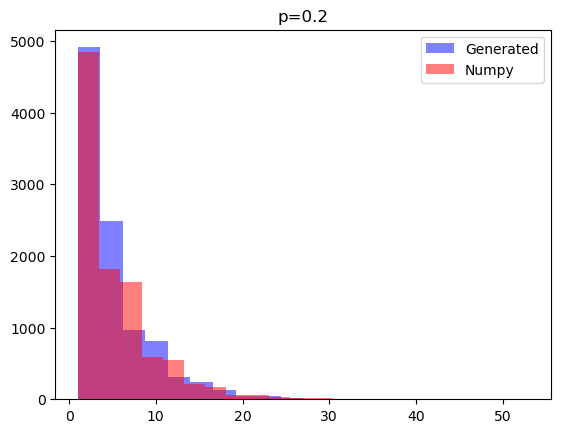

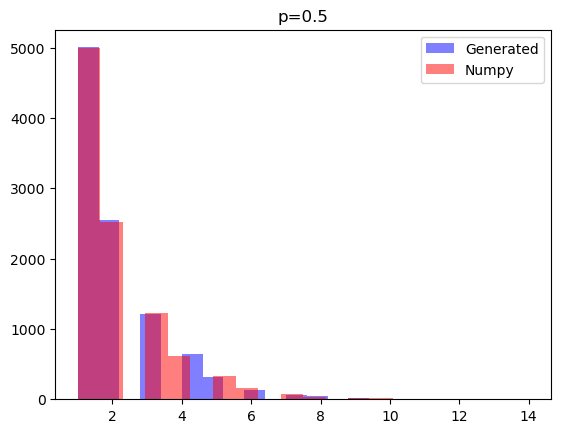

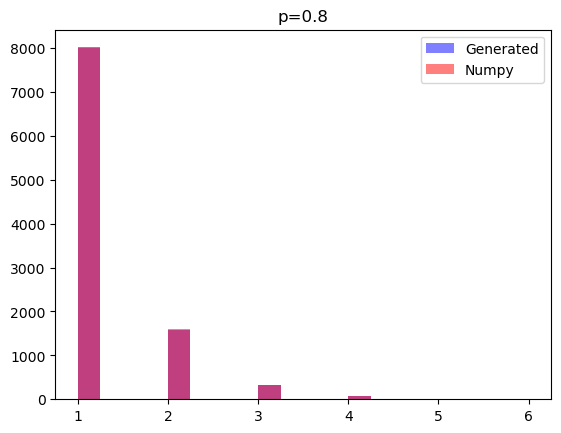

In [77]:
ps = [0.2, 0.5, 0.8]


for p in ps:
    
    U = np.random.uniform(size=10000)
    
    g_d, g_d_ref = geometric_dist(U, p), np.random.geometric(p=p, size = 10000)
    
    plt.hist(g_d, bins=20, color="b", label="Generated",alpha=0.5)
    plt.hist(g_d_ref, bins=20, color="r", label="Numpy",alpha=0.5)
    plt.title(f"p={p}")

    plt.legend()

    plt.show()
    
    



### 2 - 6 Point Distribution Simulation

Simulate the 6 point distribution

| $X$  |  1 | 2  | 3  | 4  |5   | 6  |
|---|---|---|---|---|---|---|
| $p_i$  | 7/48  | 5/48  | 1/8  | 1/16  | 1/4  | 5/16  |

In [78]:

# 6-point distribution

dist_6pt = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

#### (a) by applying a direct (crude) method

In [79]:
# Helper function for crude method of discrete random sampling

def insert_into_categories(values, intervals):
    
    discrete_sample = []

    for value in values:
        for i, interval in enumerate(intervals): # Linear search    
            if interval[0] < value and value <= interval[1]:
    
                discrete_sample.append(i+1)
    
    return discrete_sample

def crude_method(pdf, size):    
    
    U = np.random.uniform(size=size)
    cdf = np.cumsum(pdf)
    intervals = [(0, cdf[0])]+[(cdf[i-1], cdf[i]) for i in range(1, len(cdf))]
    
    return insert_into_categories(U, intervals)

Generating sample and testing

----- Direct/Crude Method -----

----- Count Distributions -----
Generated: [1518, 1006, 1207, 593, 2502, 3174]
Expected: [1458.3333333333335, 1041.6666666666667, 1250.0, 625.0, 2500.0, 3125.0]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 7.549965714285706
P-value: 0.18284422214133986

----- Visual Comparison between PDFs -----


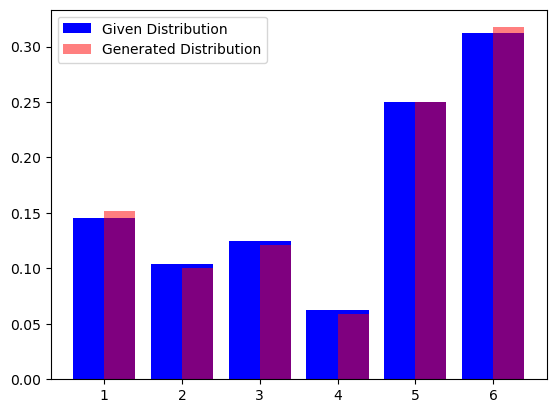

In [80]:
print("----- Direct/Crude Method -----\n")

crude_sample = crude_method(dist_6pt, 10000)



test(make_freq_dist(crude_sample), dist_6pt, crude_sample)

#### (b) by using the the rejection method

In [81]:
def accept_reject_method(pdf, size, k, c=1):
    
    X = []
    
    while len(X) < size:
    
        U1, U2 = np.random.uniform(), np.random.uniform()
        I = floor(k*U1)+1
        p_I = pdf[int(I)-1]
        if U2 <= p_I/c: X.append(I)
    
    
    return X

----- Accept/Reject Method -----

----- Count Distributions -----
Generated: [1443, 1060, 1210, 645, 2591, 3051]
Expected: [1458.3333333333335, 1041.6666666666667, 1250.0, 625.0, 2500.0, 3125.0]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 7.468605714285714
P-value: 0.18805598481846914

----- Visual Comparison between PDFs -----


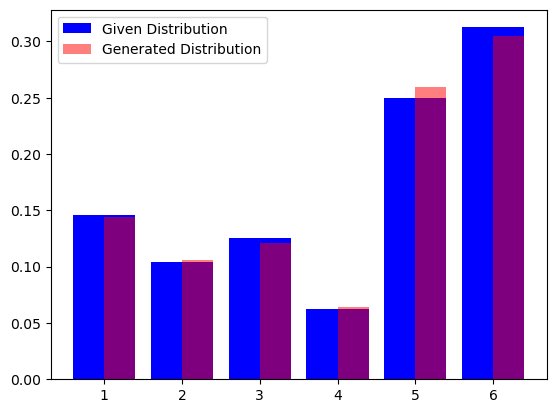

In [82]:
ar_sample = accept_reject_method(dist_6pt, 10000, len(dist_6pt))
print("----- Accept/Reject Method -----\n")
test(make_freq_dist(ar_sample), dist_6pt, ar_sample)

#### (c) by using the Alias method

In [108]:
def gen_tables(pdf,k=6):
    
    
    L = [i for i in range(k)] # 1
    F = [k*i for i in pdf] # 2

    G, S = [i for i in range(len(F)) if F[i] >= 1], [i for i in range(len(F)) if F[i] <= 1] # 3

         
    print(f"G: {G}")
    print(f"S: {S}")

    
    while len(S) != 0: # 4
       
        i, j = G[0], S[0] # (a)
       
        L[j] = i #(b)
        F[i] = F[i] - (1 - F[j]) #(b)
       
        if F[i] < 1-(1e-8): # (c)
       
            G = G[1:]
            S.append(i)
       
        S = S[1:] # (d)

    print(f"L: {L}")
    print(f"F: {F}")

    return F, L

def alias_method(pdf, size, k=6):
    F, L = gen_tables(pdf)
    X = []
    while len(X) < size:
    
        U1, U2 = np.random.uniform(), np.random.uniform()
        I = floor(k*U1)

        if U2 <= F[I]: X.append(I+1)
        else: X.append(L[I]+1)
    return X

G: [4, 5]
S: [0, 1, 2, 3]
L: [4, 4, 4, 5, 5, 5]
F: [0.875, 0.625, 0.75, 0.375, 0.75, 1.0]
----- Alias Method -----

----- Count Distributions -----
Generated: [14477, 10348, 12460, 6265, 25145, 31305]
Expected: [14583.333333333334, 10416.666666666668, 12500.0, 6250.0, 25000.0, 31250.0]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 2.329772571428596
P-value: 0.8018843455002385

----- Visual Comparison between PDFs -----


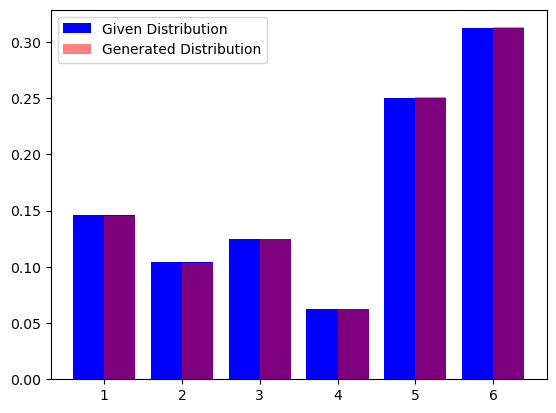

In [109]:
alias_sample = alias_method(dist_6pt, 100000)

print("----- Alias Method -----\n")
test(make_freq_dist(alias_sample), dist_6pt, alias_sample)

### 3 - Analysis of Results 

Compare the three different methods using adequate criteria, then discuss the results.

Results for each test:


| Method   | $\chi^2$ (p-value)  |
|---|---|
| Crude/Direct  | 0.593 |
| Rejection  | 0.362  |
| Alias  | 0.802  |



**Problem 3 - Conclusion**

- Based on values obtained from $\chi^2$ testing, we have the following heirarchy of methods which produce the "best" results:
    1. Alias
    2. Accept/Reject
    3. Crude/Direct

### 4 - Recommendations


**Problem 4 - Recommendations**